# Анализ бизнес показателей приложения Uncknow

На основании имеющегося лога сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27 выгрузки из покупок за этот прериод а также статистики рекламных расходов необходимо изучить как пользователи пользуются продуктом , когда они начинают покупать , скалько денег приносит каждый клиент, когда он окупается и какие факторы отрицательно влияют на привлечение пользователей.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузите-данные-и-подготовьте-их-к-анализу" data-toc-modified-id="Загрузите-данные-и-подготовьте-их-к-анализу-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузите данные и подготовьте их к анализу</a></span><ul class="toc-item"><li><span><a href="#Загрузка-файлов" data-toc-modified-id="Загрузка-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка файлов</a></span></li><li><span><a href="#Предобработка-данных-и-замена-типа-данных" data-toc-modified-id="Предобработка-данных-и-замена-типа-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных и замена типа данных</a></span></li><li><span><a href="#Вывод-по-предобработке" data-toc-modified-id="Вывод-по-предобработке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по предобработке</a></span></li></ul></li><li><span><a href="#Задание-функций-для-рассчета-LTV,-ROI,-RR,-CR" data-toc-modified-id="Задание-функций-для-рассчета-LTV,-ROI,-RR,-CR-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задание функций для рассчета LTV, ROI, RR, CR</a></span></li><li><span><a href="#Проведение-исследовательского-анализа-данных" data-toc-modified-id="Проведение-исследовательского-анализа-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведение исследовательского анализа данных</a></span><ul class="toc-item"><li><span><a href="#Создание-таблицы-профиле-и-нахождение-интервала-привлечения-пользователей" data-toc-modified-id="Создание-таблицы-профиле-и-нахождение-интервала-привлечения-пользователей-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание таблицы профиле и нахождение интервала привлечения пользователей</a></span></li><li><span><a href="#Распределение-пользователей-по-странам:" data-toc-modified-id="Распределение-пользователей-по-странам:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Распределение пользователей по странам:</a></span></li><li><span><a href="#Какими-устроиства-используют-пользователи" data-toc-modified-id="Какими-устроиства-используют-пользователи-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Какими устроиства используют пользователи</a></span></li><li><span><a href="#Количество-привлеченных-пользовтелей-среди-рекламных-каналов" data-toc-modified-id="Количество-привлеченных-пользовтелей-среди-рекламных-каналов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Количество привлеченных пользовтелей среди рекламных каналов</a></span></li><li><span><a href="#Количество-привлеченных-пользовтелей-среди-рекламных-каналов-по-странам" data-toc-modified-id="Количество-привлеченных-пользовтелей-среди-рекламных-каналов-по-странам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Количество привлеченных пользовтелей среди рекламных каналов по странам</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Оцените-окупаемость-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оцените-окупаемость-рекламы-для-привлечения-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оцените окупаемость рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Анализ-общей-окупаемости-рекламы" data-toc-modified-id="Анализ-общей-окупаемости-рекламы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Анализ общей окупаемости рекламы</a></span></li><li><span><a href="#Проанализируем-окупаемость-рекламы-с-разбивкой-по-устройствам" data-toc-modified-id="Проанализируем-окупаемость-рекламы-с-разбивкой-по-устройствам-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Проанализируем окупаемость рекламы с разбивкой по устройствам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-странам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-странам-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по странам</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-United-States" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-United-States-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по каналам для United States</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-United-States" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-United-States-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по устроиствам для United States</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-France" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-France-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по каналам для France</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-France" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-France-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по устроиствам для France</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-Germany" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-Germany-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по каналам для Germany</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-Germany" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-Germany-5.9"><span class="toc-item-num">5.9&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по устроиствам для Germany</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-UK" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-каналам-для-UK-5.10"><span class="toc-item-num">5.10&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по каналам для UK</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-UK" data-toc-modified-id="Анализ-окупаемости-рекламы-c-разбивкой-по-устроиствам-для-UK-5.11"><span class="toc-item-num">5.11&nbsp;&nbsp;</span>Анализ окупаемости рекламы c разбивкой по устроиствам для UK</a></span></li><li><span><a href="#Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам" data-toc-modified-id="Анализ-окупаемости-рекламы-с-разбивкой-по-рекламным-каналам-5.12"><span class="toc-item-num">5.12&nbsp;&nbsp;</span>Анализ окупаемости рекламы с разбивкой по рекламным каналам</a></span></li><li><span><a href="#Расчет-конверсии-и-удержания-по-каналам-для-отдельно-для-каждой-страны" data-toc-modified-id="Расчет-конверсии-и-удержания-по-каналам-для-отдельно-для-каждой-страны-5.13"><span class="toc-item-num">5.13&nbsp;&nbsp;</span>Расчет конверсии и удержания по каналам для отдельно для каждой страны</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5.14"><span class="toc-item-num">5.14&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Загрузите данные и подготовьте их к анализу

### Загрузка файлов

In [1]:
import pandas as pd
import numpy as np
import math 
import seaborn as sns
from scipy import stats as st
import random
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
pd.set_option('display.max_columns', 40)

In [2]:
try:
    visits, orders, costs = ( 
        pd.read_csv('visits_info_short.csv'), # журнал сессий
        pd.read_csv('orders_info_short.csv'), # журнал покупок
        pd.read_csv('costs_info_short.csv'),  # траты на рекламу
    
    )
except:
    visits, orders, costs = ( 
        pd.read_csv('/datasets/visits_info_short.csv'),
        pd.read_csv('/datasets/orders_info_short.csv'),
        pd.read_csv('/datasets/costs_info_short.csv'),
    )

### Предобработка данных и замена типа данных

In [3]:
db_list = [visits, orders, costs]
for i in db_list:
    display(i.head())
    print(i.info())
    print(' Количество видимых дубликатов в таблице =', i.duplicated().sum())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
 Количество видимых дубликатов в таблице = 0


User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
 Количество видимых дубликатов в таблице = 0


dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
 Количество видимых дубликатов в таблице = 0


In [4]:
len(costs['Channel'].unique())

10

In [5]:
orders['Revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: Revenue, dtype: float64

In [6]:
visits.groupby('Region').agg({'User Id': 'nunique'}).sort_values('User Id', ascending=False)

User Id
Region                
United States   100002
UK               17575
France           17450
Germany          14981

In [7]:
visits.groupby('Device').agg({'User Id': 'nunique'}).sort_values('User Id', ascending=False)

User Id
Device          
iPhone     55798
Android    36377
PC         31681
Mac        31335

In [8]:
visits.groupby('Channel').agg({'User Id': 'nunique'}).sort_values('User Id', ascending=False)

User Id
Channel                    
organic               57673
FaceBoom              29916
TipTop                20204
OppleCreativeMedia     8929
LeapBob                8875
WahooNetBanner         8845
RocketSuperAds         4988
MediaTornado           4895
YRabbit                4882
AdNonSense             4199
lambdaMediaAds         2410

In [9]:
# преобразование данных о времени
visits['Session Start'] = pd.to_datetime(visits['Session Start'])
visits['Session End'] = pd.to_datetime(visits['Session End'])
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [10]:
visits.rename(columns={"User Id": "user_id", "Region": "region", "Device": "device", "Channel": "channel", "Session Start": "session_start", "Session End": "session_end",}, inplace=True)
orders.rename(columns={"User Id": "user_id", "Event Dt": "event_dt", "Revenue": "revenue"}, inplace=True)
costs.rename(columns={"Channel": "channel"}, inplace=True)

### Вывод по предобработке

После загрузки данных их анализа с дальнейшей предобработкой можно сделать следущие выводы:
* Данные не содержали пропусков и дубликатов ни в одной из таблиц.
* Тип данных в колонках каждой из таблиц был указан верно кроме колонок с датой которые в последствие были приведены к нужному типу

Выводы по данным из таблицы visits:
* Среди стран в котрых проживают пользователи преобладают граждане USA. Всего в выборке присутствуют пользователи из 4 стран: USA UK France Germany
* Пользователи посещали приложение с 4 девайсов: iPhone-55798, Android-29916, PC-31681, Mac-31335
* Каналы с которых в основном приходили пользователи было 11. Основным каналом был Organic так же значительныя часть пользователей приходила от TipTop и FaceBoom


Выводы по данным из таблицы orders:
* в среднем заказы были на сумму не более 4.99 доллара ( медианое значение так как менее подвержено выбросам)

Выводы по данным из таблицы costs:
* в анализе участвуют 10 различных рекламных источника


 


## Задание функций для рассчета LTV, ROI, RR, CR 

In [11]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [12]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [13]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [14]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [15]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [17]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [18]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Проведение исследовательского анализа данных

### Создание таблицы профиле и нахождение интервала привлечения пользователей

In [19]:
# создание таблицы пользовательских профилей
profiles = get_profiles(sessions=visits, orders=orders, ad_costs=costs)
display(profiles.head(5)) 

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

In [20]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()
print('Минимальная дата привлечения {0}, максимальная дата привлечения {1}'.format(min_analysis_date, observation_date))

Минимальная дата привлечения 2019-05-01, максимальная дата привлечения 2019-10-27


### Распределение пользователей по странам:

In [21]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                              ).sort_values([('payer', 'mean')], ascending=False
                                           ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### Какими устроиства используют пользователи

In [22]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                              ).sort_values([('payer', 'mean')], ascending=False
                                           ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### Количество привлеченных пользовтелей среди рекламных каналов

In [23]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']}
                               ).sort_values([('payer', 'mean')], ascending=False
                                            ).style.format({('payer', 'sum'): '{:.0f}', ('payer', 'mean'): '{:.2%}'})

### Количество привлеченных пользовтелей среди рекламных каналов по странам

In [24]:
# посмотрим как рекламные каналы распределены по регионам
profiles.groupby(['region', 'channel']
                ).agg({'user_id': 'nunique'}
                                           ).sort_values(by=['region', 'user_id'], ascending=False)

user_id
region        channel                    
United States organic               38173
              FaceBoom              29144
              TipTop                19561
              RocketSuperAds         4448
              MediaTornado           4364
              YRabbit                4312
UK            organic                6421
              OppleCreativeMedia     3052
              LeapBob                3046
              WahooNetBanner         3003
              AdNonSense             1295
              lambdaMediaAds          758
Germany       organic                5453
              WahooNetBanner         2579
              OppleCreativeMedia     2562
              LeapBob                2519
              AdNonSense             1219
              lambdaMediaAds          649
France        organic                6392
              OppleCreativeMedia     2991
              LeapBob                2988
              WahooNetBanner         2971
              AdNonSense             1366
              lambdaMediaAds          742

### Вывод

По результатам исследовательского аналилиза данных можно сделать следущие выводы:

* Наибольшее количество посетителей и платящих пользователей в приложение приходит из США (причем, с большим отрывом от других стран)

* Из всех устройств чаще всего пользователи заходят и платят с мобильных платформ: iPhone и Android, а наибольшая доля платящих у Mac и iPhone

* Из всех каналов больше всего пришло пользователей из поисковых систем (organic), но в этом же канале - самая низкая доля платящих

* Самая большая доля платящих пользователей приходится на каналы FaceBoom, AdNonSense, lambdaMediaAds

* Самая низкая доля платящих пользователей приходится на каналы LeapBob, OppleCreativeMedia и вышеупомянутый organic

* Самыми популярными каналами в Великобритании, Германии и Франции являются: OppleCreativeMedia, LeapBob, WahooNetBanner

* Очевидно, что FaceBoom и TipTop поднимаются на верхние строчки общего рейтинга рекламных каналов только благодаря США, где привлечение пользователей из этих каналов наиболее успешно.

* Также, мы видим, что канал organic занимает верхние строчки во всех регионах.



## Маркетинг

In [25]:
# Посмотрим сколько всего трат на маркетинг
print('общая сумма расходов на маркетинг составила - {}'.format(round(costs['costs'].sum(), 2)))

общая сумма расходов на маркетинг составила - 105497.3


In [26]:
# сколько трат было на каждый из рекламных каналов
costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs', ascending=False)

costs
channel                     
TipTop              54751.30
FaceBoom            32445.60
WahooNetBanner       5151.00
AdNonSense           3911.25
OppleCreativeMedia   2151.25
RocketSuperAds       1833.00
LeapBob              1797.60
lambdaMediaAds       1557.60
MediaTornado          954.48
YRabbit               944.22

На лидирующих позиция по затратам на маркетинг мы видим каналы, из которых к нам пришло наибольшее количество пользователей: для США - TipTop и FaceBoom, для других стран - WahooNetBanner, AdNonSense и OppleCreativeMedia

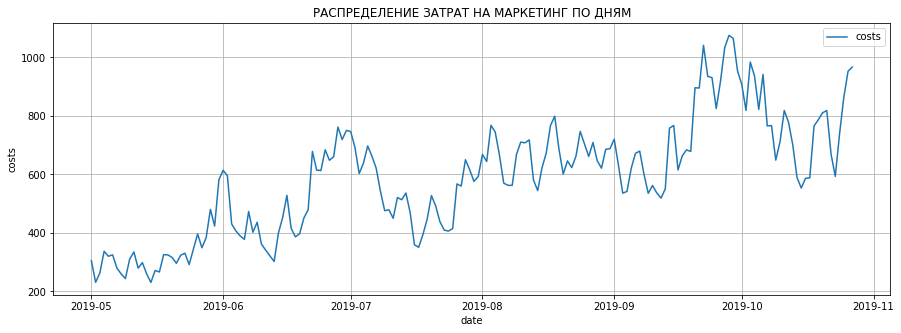

In [27]:
costs.groupby('dt').agg({'costs':'sum'}).plot(figsize=(15, 5))
plt.xlabel('date')
plt.ylabel('costs')
plt.title('РАСПРЕДЕЛЕНИЕ ЗАТРАТ НА МАРКЕТИНГ ПО ДНЯМ')
plt.grid(True)
plt.show();

Text(0.5, 1.0, 'РАСПРЕДЕЛЕНИЕ ЗАТРАТ НА МАРКЕТИНГ ПО ДНЯМ РАЗДЕЛЬНО ПО КАНАЛАМ')

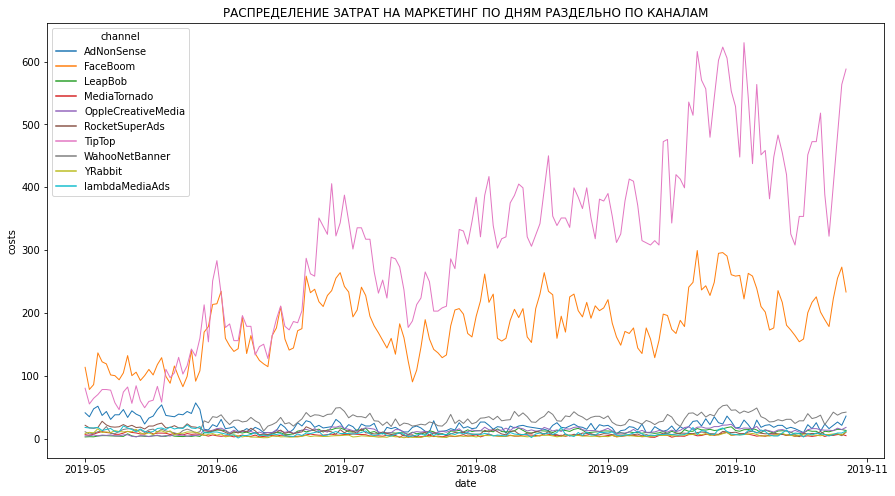

In [28]:
plt.figure(figsize = (15,8))
sns.lineplot(
    data=costs.groupby(['dt', 'channel']).agg({'costs':'sum'}).reset_index(),
    x='dt', y='costs', hue='channel',
    estimator=None, lw=1,
)
plt.xlabel('date')
plt.ylabel('costs')
plt.title('РАСПРЕДЕЛЕНИЕ ЗАТРАТ НА МАРКЕТИНГ ПО ДНЯМ РАЗДЕЛЬНО ПО КАНАЛАМ')

In [29]:
# распределение CAC по источникам
profiles.groupby('channel').agg({'acquisition_cost':'mean'}
                               ).sort_values(by='acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Самыми дорогими каналами для привлечения стали FaceBoom и TipTop - лидеры по новым пользователям в США. Далее в рейтинге идут топ-каналы других стран.

In [30]:
# распределение CAC
profiles['acquisition_cost'].describe()

count    150008.000000
mean          0.703278
std           0.954097
min           0.000000
25%           0.000000
50%           0.247500
75%           1.108943
max           3.715385
Name: acquisition_cost, dtype: float64

In [31]:
profiles.query('channel != "organic"')['acquisition_cost'].mean()

1.1274813239427588

<AxesSubplot:>

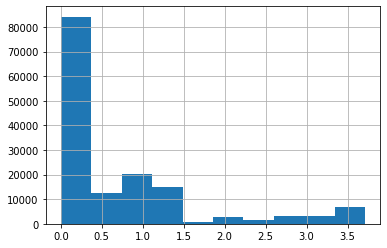

In [32]:
# покажем на гистограме
profiles['acquisition_cost'].hist(bins=10)

### Вывод

По результатам маркетинговой части можно сделать следующие выводы:
 * Больше всего было потрачено на каналы привлечения TipTop и FaceBoom и траты на одного нового юзера по этим каналам обходятся дороже. Данные каналы привалирую в регионе USA. Так же эти каналы входят в 4 лучших по конверсии пользователей в платящих.
 * Канал AdNonSense имеех хорошие показатели по конвертации привлеченных пользователей в платящих также входит в 4 каналов на которые было потрачено больше всего средст а по  стоимости привлечения пользователя занимает 3 строчку. Этот канал привлечения представлен только в европейской части рекламной компании.
 * Так же можно сказать что за представленны период траты на маркетинг увеличиваются в 6,7,9,10 месяцы в первые две недели наблюдается спад по затратам на рекламу и уже с середины месяца идет рост.
 * В среднем стоимость на каждого нового юзера на рекламу тратится 1.12

## Оцените окупаемость рекламы для привлечения пользователей

С помощью LTV и ROI:
- Проанализируйте общую окупаемость рекламы;
- Проанализируйте окупаемость рекламы с разбивкой по устройствам;
- Проанализируйте окупаемость рекламы с разбивкой по странам;
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14 #горизонт анализа

In [34]:
profiles = profiles.query('channel != "organic"')

### Анализ общей окупаемости рекламы

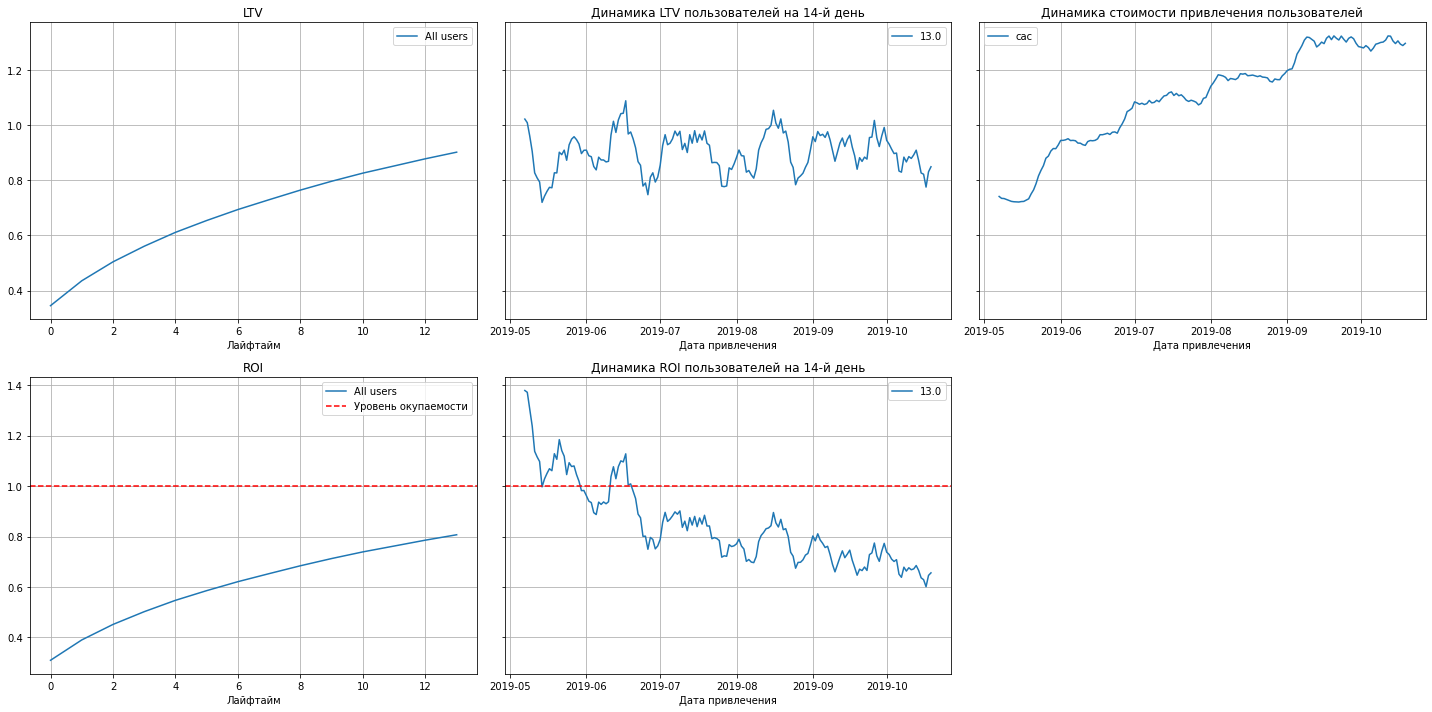

In [35]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:

* Реклама не окупается. ROI в последнем лайфтайме только стремится к 80%, а его динамика вовсе отрицательна
* CAC растёт это значит, причины могут быть в увеличении рекламного бюджета
* LTV достаточно стабилен, но имеет спады - обычно, в конце месяцы. И пиковые значения - обычно, в середине месяца

### Проанализируем окупаемость рекламы с разбивкой по устройствам

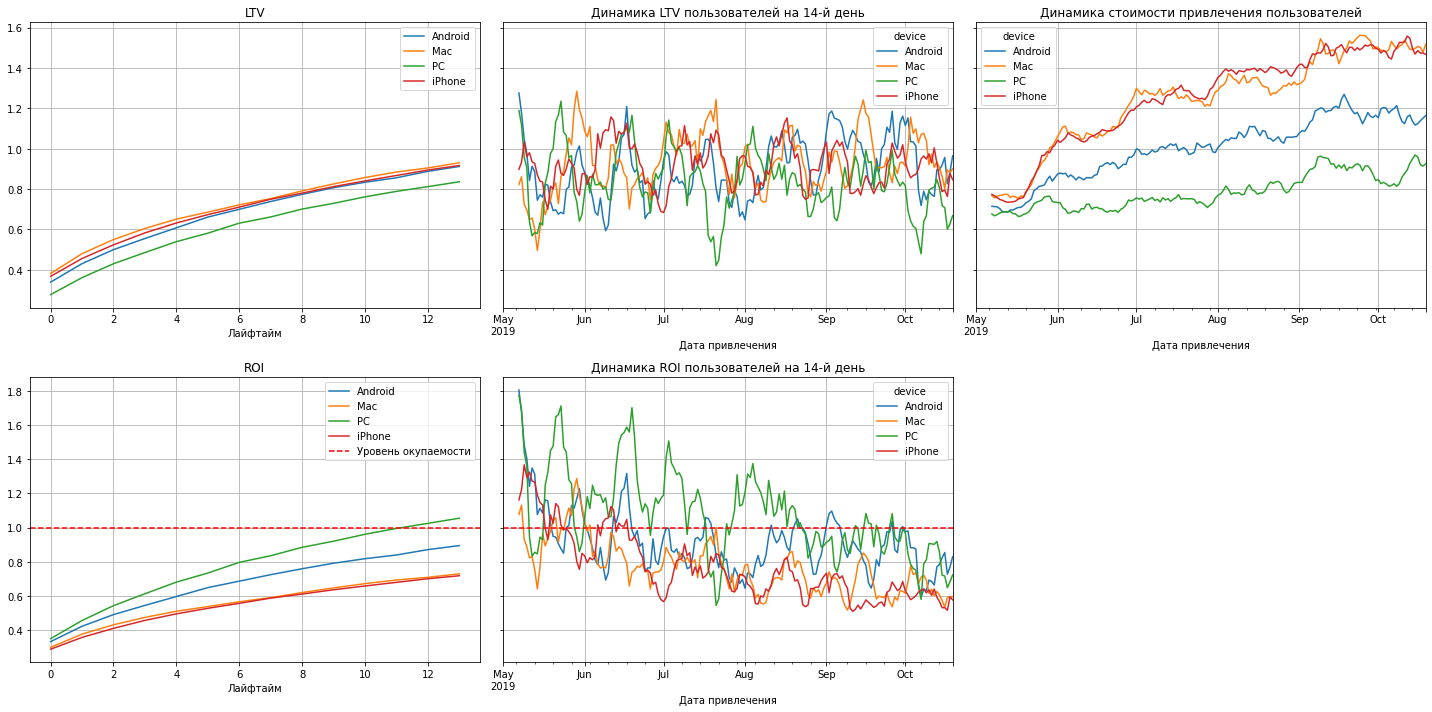

In [36]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы:

* Реклама окупается только для пользователей PC, у этих всех устройств отрицательная динамика ROI.
* Стоимость привлечения растет для всех, а наиболее динамично растёт для тех устройств, где реклама не окупается сильнее всего у  iPhone и Mac.
* LTV не имеет больших отличий для разных устройств. Он чуть ниже у PC, но зато качественней - это устройство единственное показало окупаемость

### Анализ окупаемости рекламы с разбивкой по странам

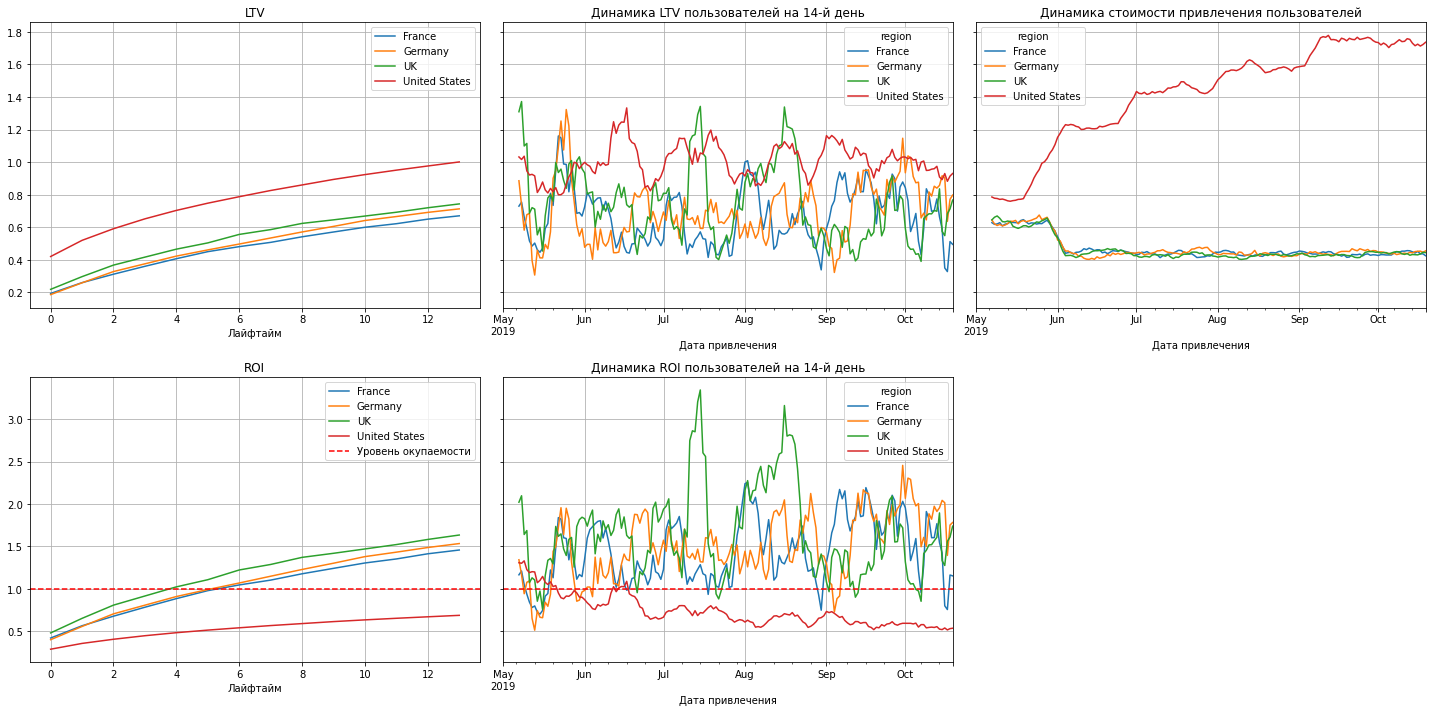

In [37]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['region']
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

- Реклама окупается везде, кроме США.
- Стоимость привлечения пользователей для США в разы больше, чем для других стран, где стоимость привлечения примерно на одном уровне.
- Динамика LTV примерно одинакова для всех стран, но у США больше пиковых значений, чем у других стран
- Динамика ROI отрицательная только для США

In [38]:
profiles_usa = profiles.query('region == "United States"')

In [39]:
profiles_usa.head()

user_id            first_ts       channel  device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
4  31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
8  58263264 2019-05-11 19:18:43      FaceBoom  iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
4  2019-10-02 2019-10-01  False          0.230769  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

### Анализ окупаемости рекламы c разбивкой по каналам для United States

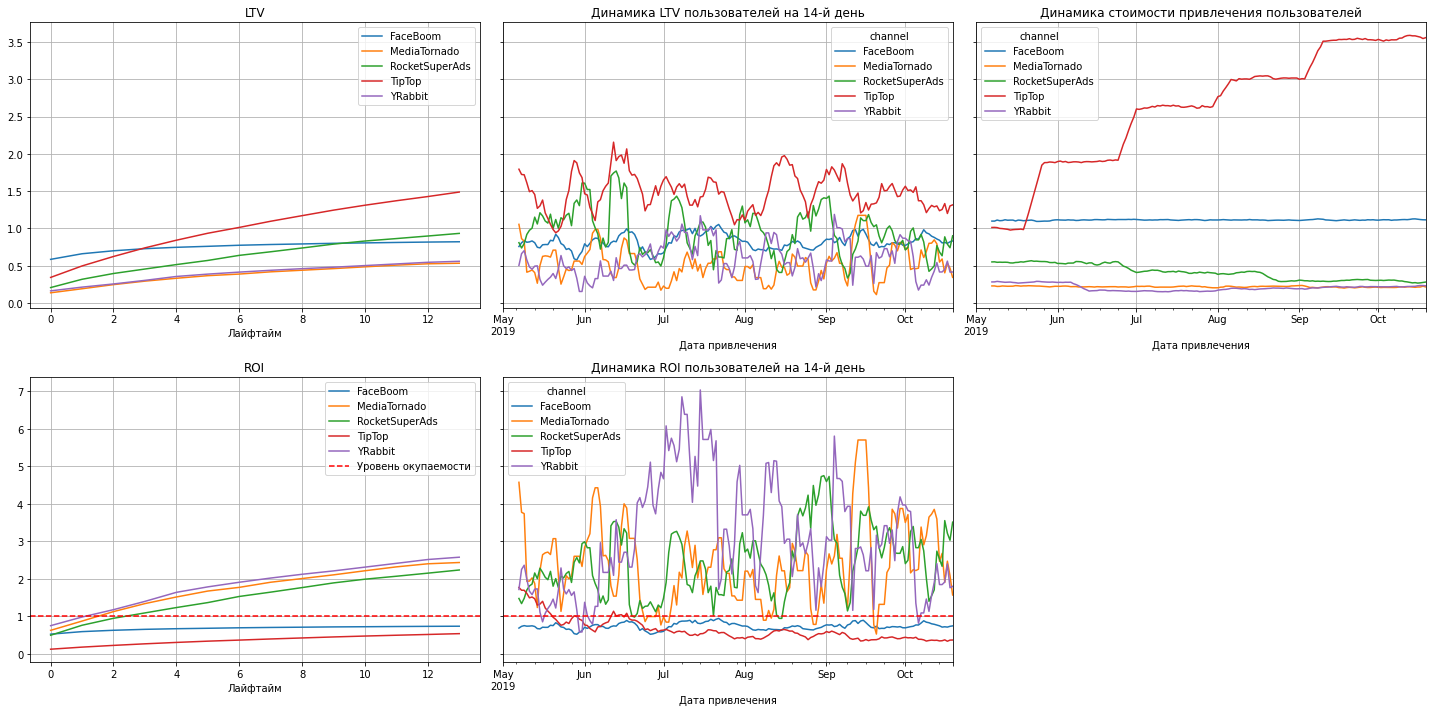

In [40]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['channel']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

TipTop и FaceBoom не окупаются, а САС TipTop постоянно растет. Среди всех каналов по которым проводилась закупка рекламы можно выделить остальные три YRabbit, MediaTornado, RocketSuperAds. У всех каналов также можно сказать стабильный LTV на последний день горизонта анализа.

### Анализ окупаемости рекламы c разбивкой по устроиствам для United States

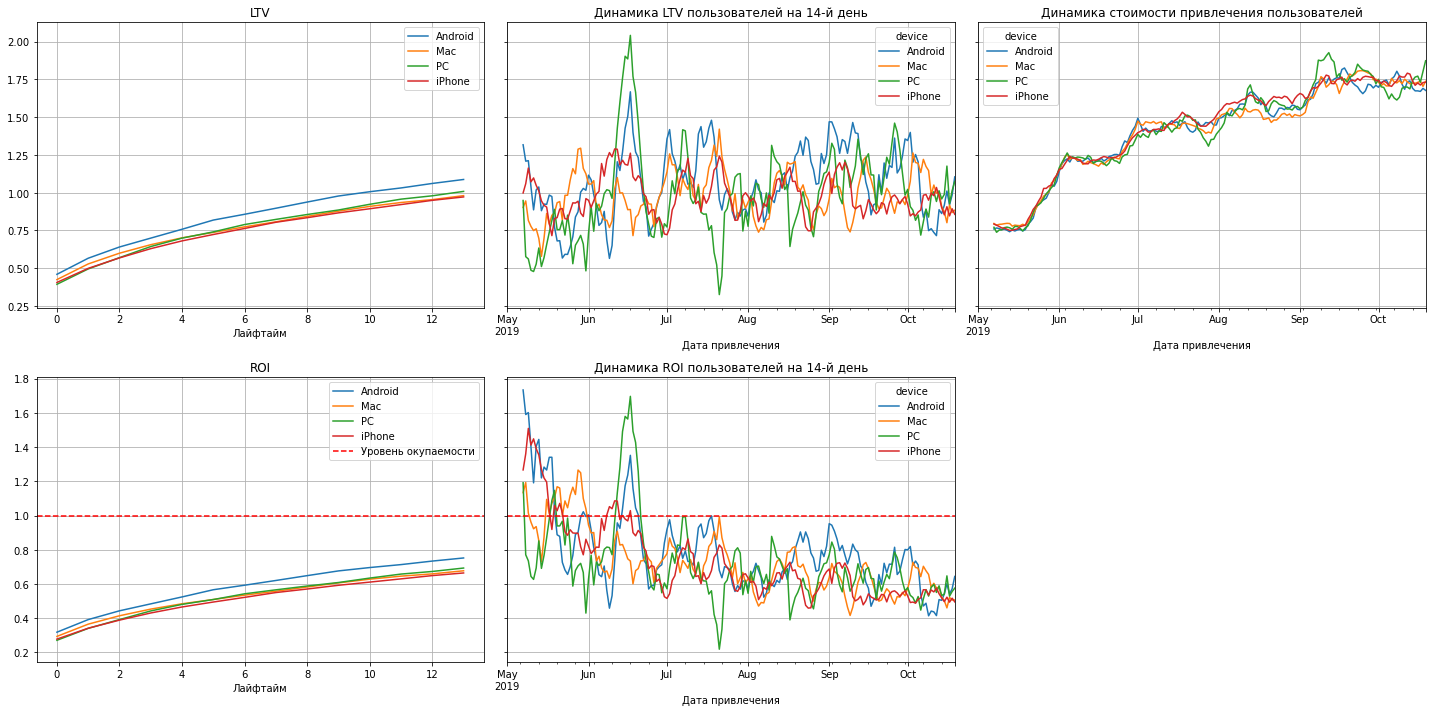

In [41]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

При разбивки по устроиствам в регионе USA можно сказать что вне зависимости от устроиства пользователя реклама не окупается а САС только растет на всем временном промежутке. ROI на конец горизонта показывает отрицательную динамику.

### Анализ окупаемости рекламы c разбивкой по каналам для France

In [42]:
profiles_france = profiles.query('region == "France"')

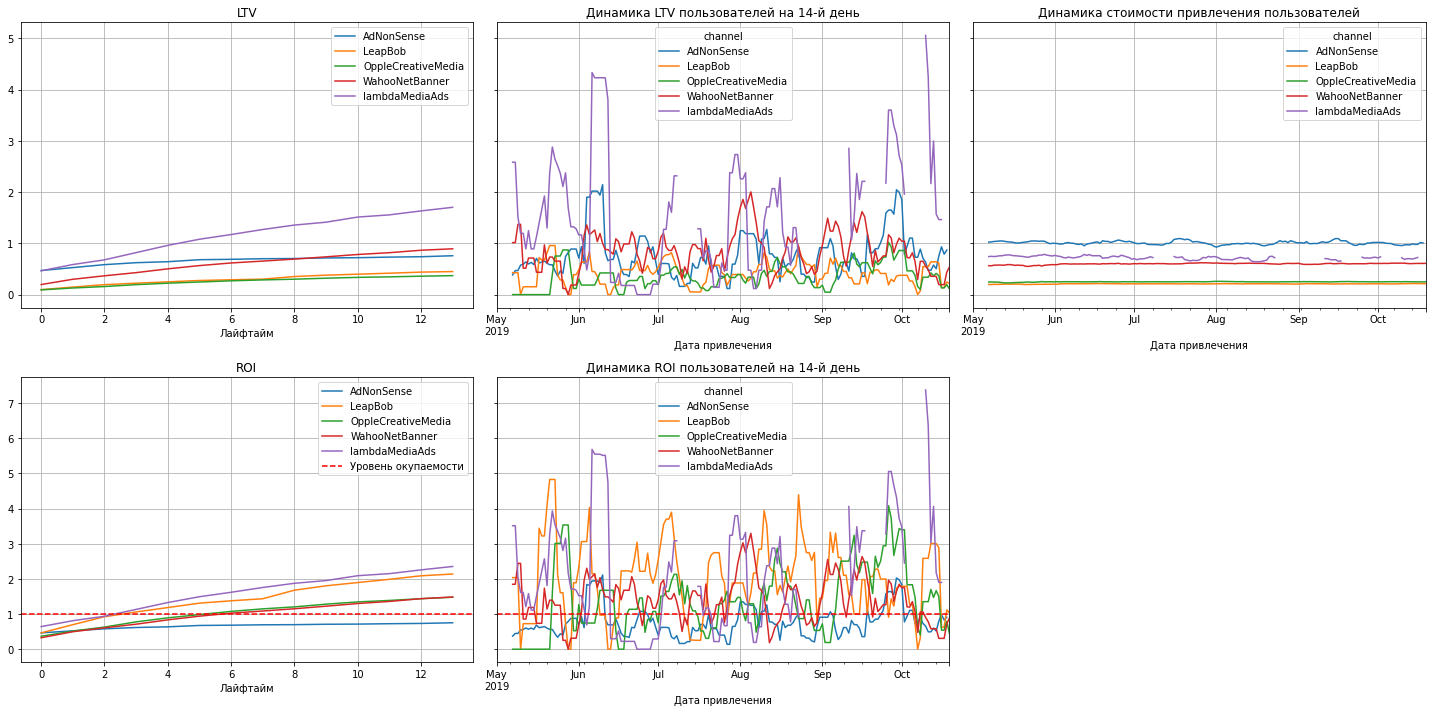

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_france, orders, observation_date, horizon_days, dimensions=['channel']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Анализ окупаемости рекламы c разбивкой по устроиствам для France

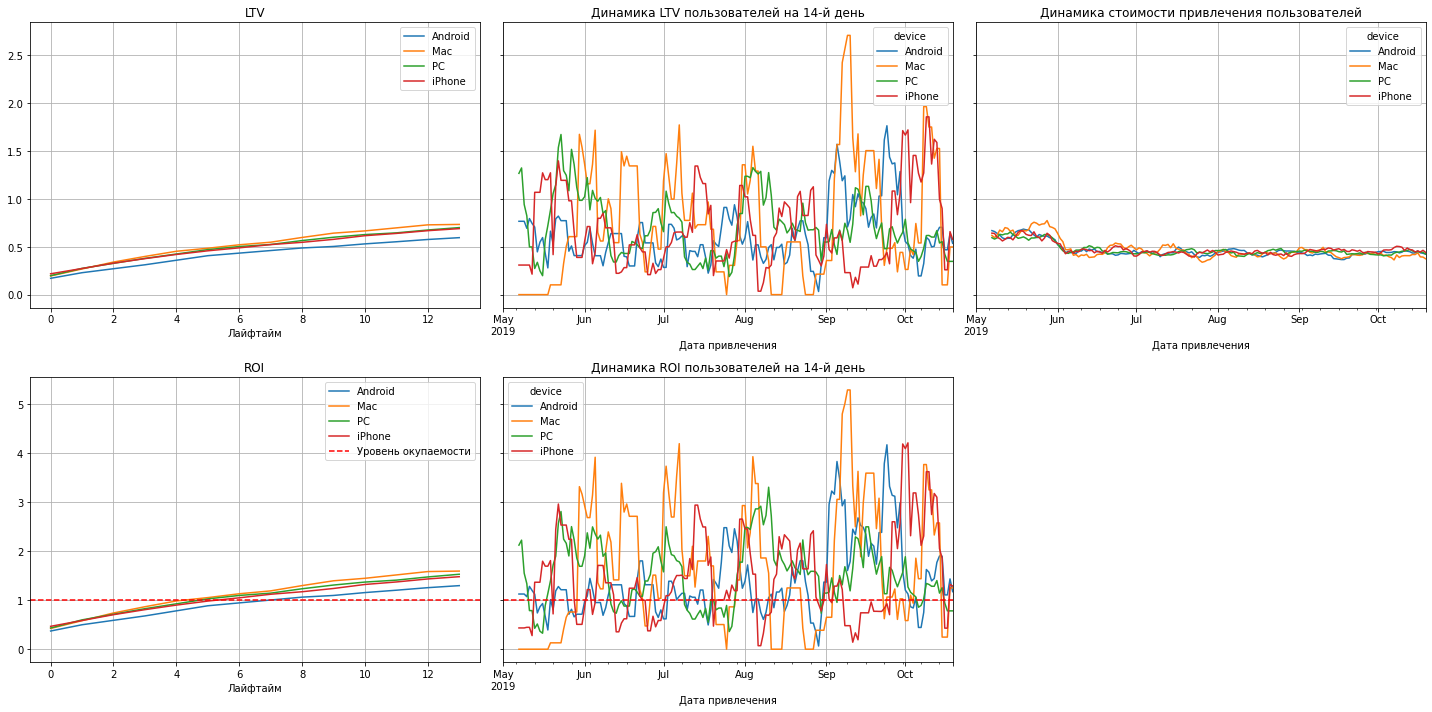

In [44]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_france, orders, observation_date, horizon_days, dimensions=['device']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Анализ окупаемости рекламы c разбивкой по каналам для Germany

In [45]:
profiles_germany = profiles.query('region == "Germany"')

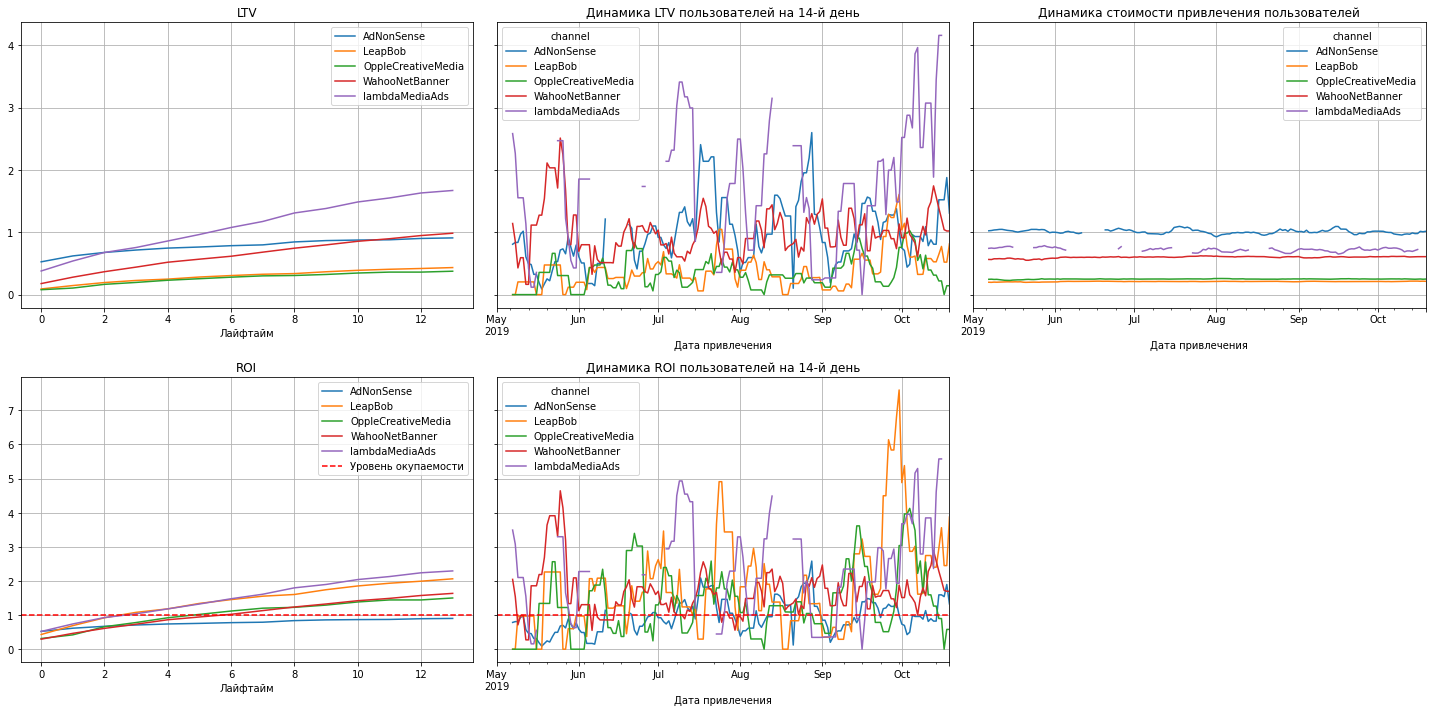

In [46]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_germany, orders, observation_date, horizon_days, dimensions=['channel']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Анализ окупаемости рекламы c разбивкой по устроиствам для Germany

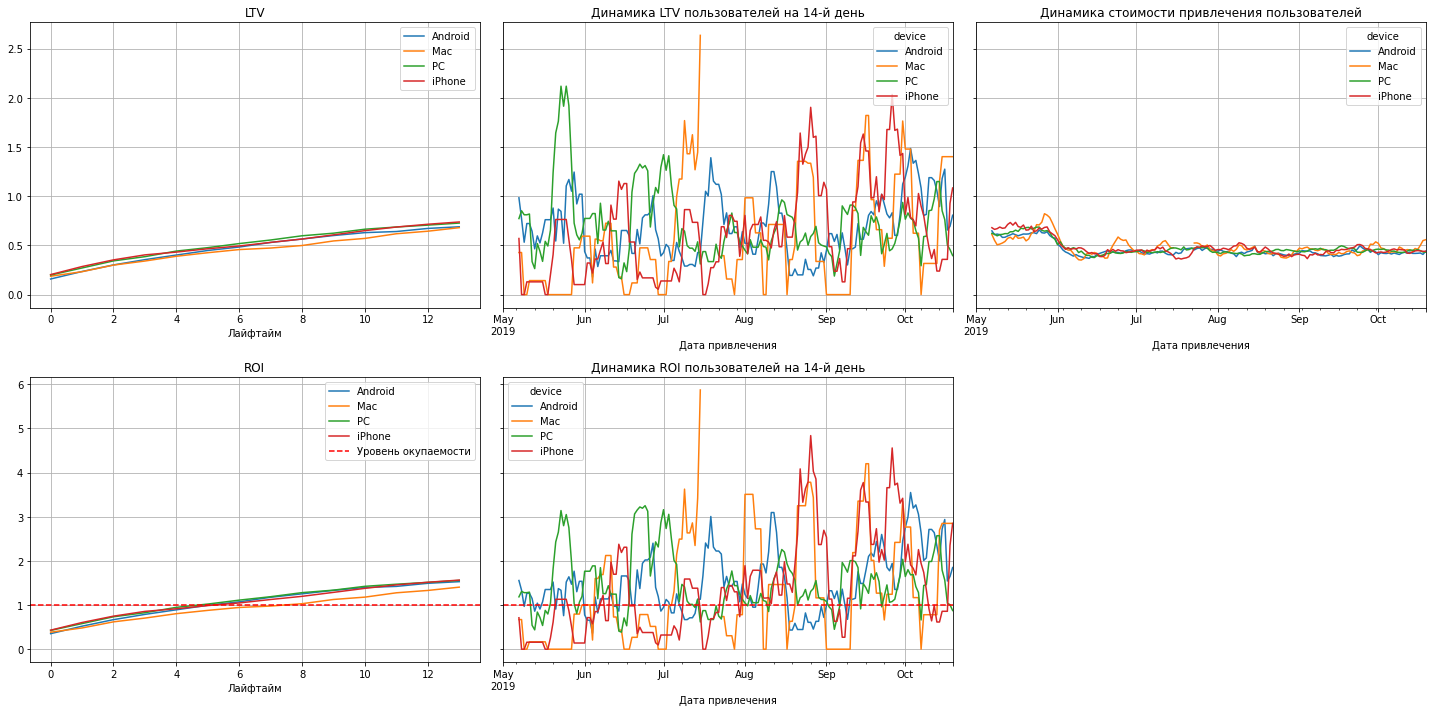

In [47]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_germany, orders, observation_date, horizon_days, dimensions=['device']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Анализ окупаемости рекламы c разбивкой по каналам для UK

In [48]:
profiles_uk = profiles.query('region == "UK"')

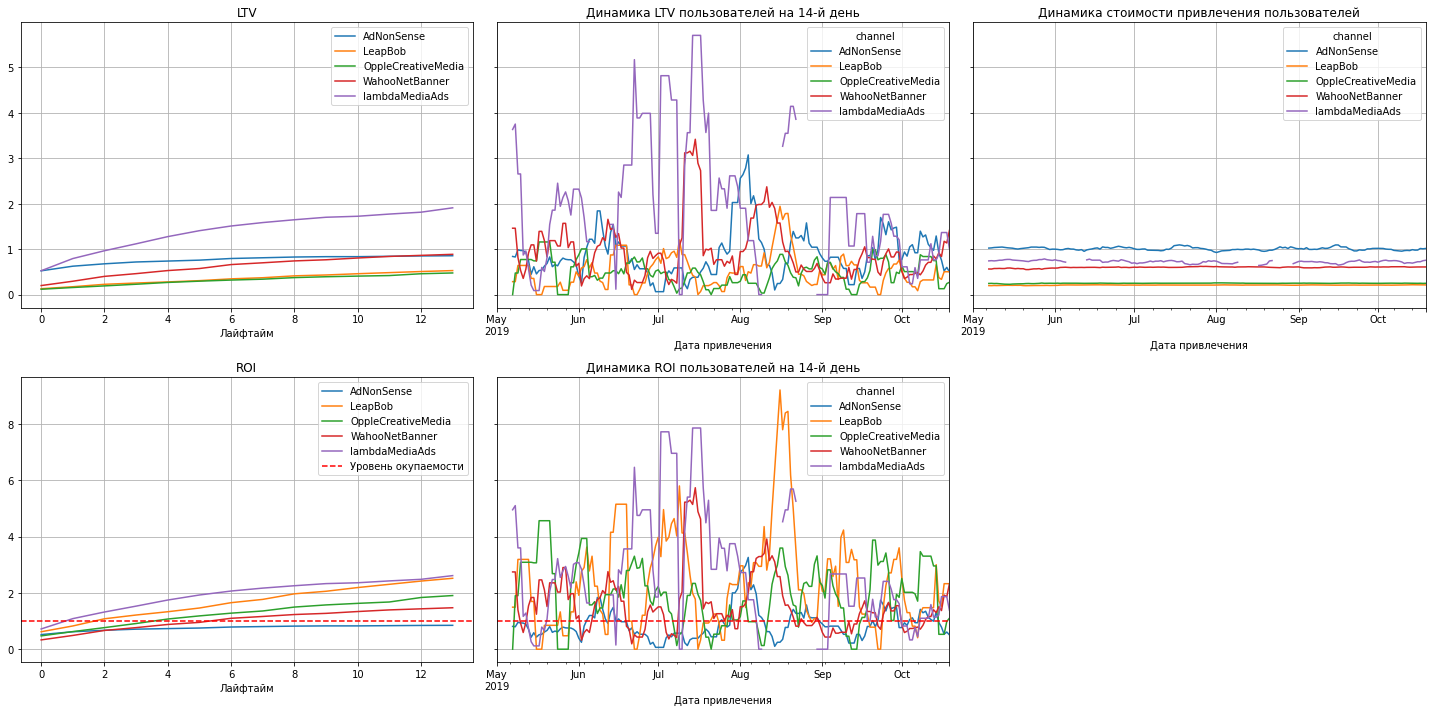

In [49]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_uk, orders, observation_date, horizon_days, dimensions=['channel']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

### Анализ окупаемости рекламы c разбивкой по устроиствам для UK

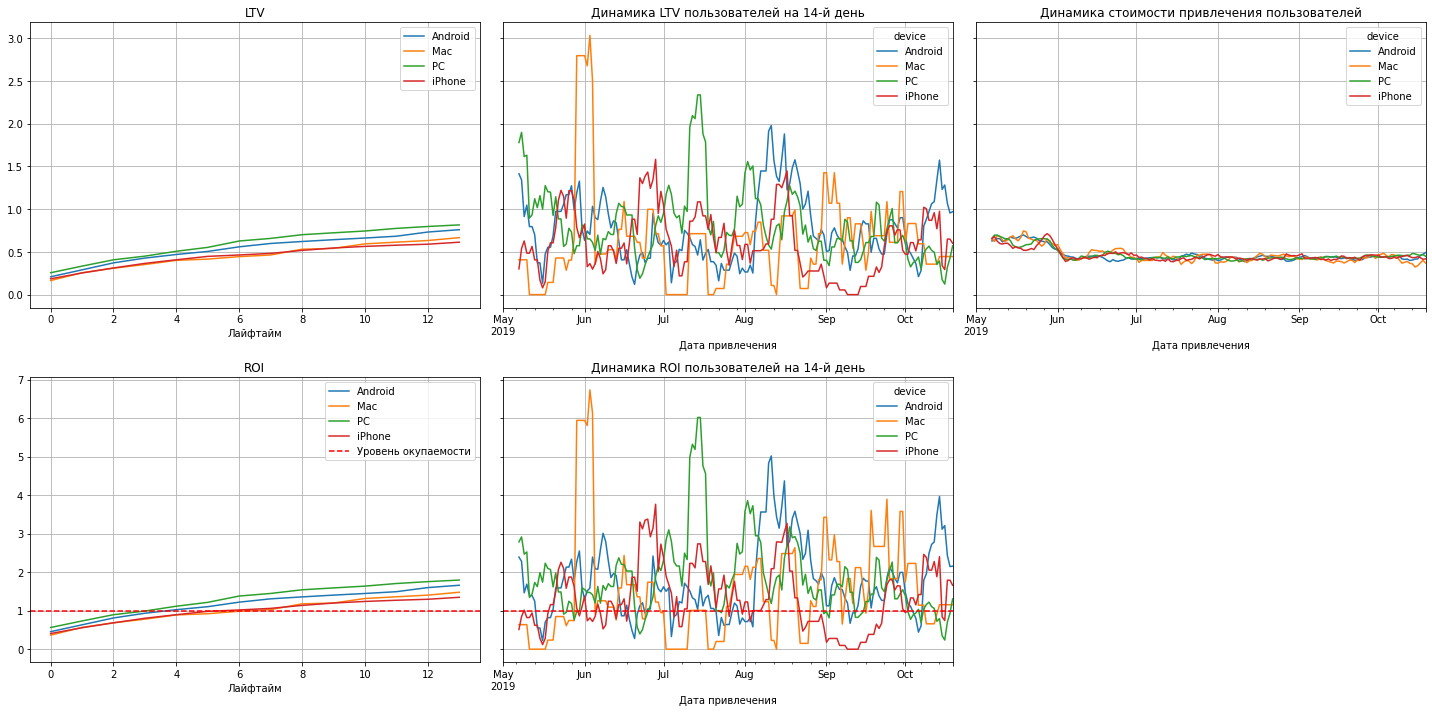

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_uk, orders, observation_date, horizon_days, dimensions=['device']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По европейскому сегменту можно сделать следущие выводы:
 * ROI имеет примерно одинаковые значения и динамику в не зависимости от устроиства а САС у по всем устроиствам одинаковый
 * Во всех европейских странах не окупается реклама по каналам AdNoneSense а лучше всего себя проявляют каналы lambdaMediaAds и LeapBob, окупаемость по этим каналам наступает уже на 2 ден.

### Анализ окупаемости рекламы с разбивкой по рекламным каналам

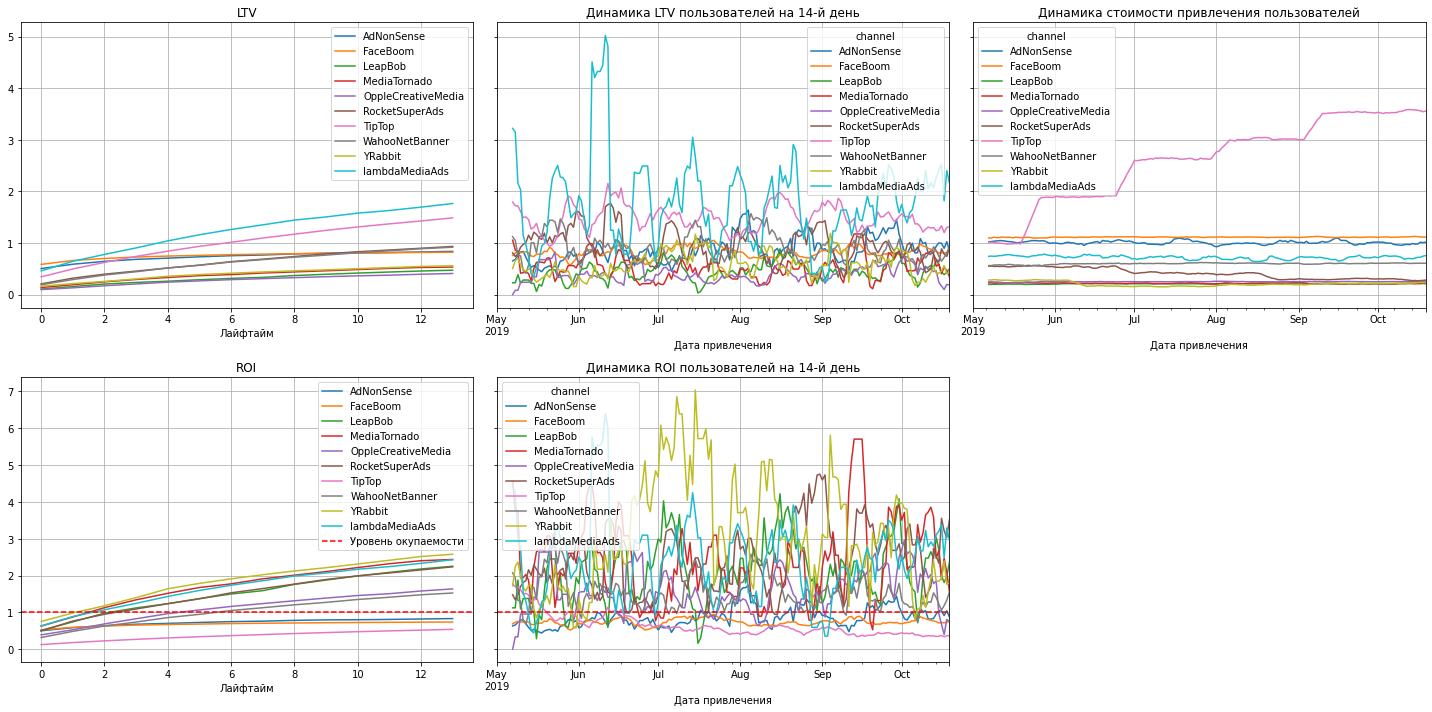

In [51]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=['channel']
)


plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Динамика LTV примерно одинакова для всех каналов, но TipTop и lambdaMediaAds имеют больший захват на пиковых значениях
Реклама окупается везде, кроме TipTop, AdNonSense и FaceBoom - для них же наблюдается отрицательная динамика ROI
Динамика стоимости привлечения сильно растёт для канала TipTop

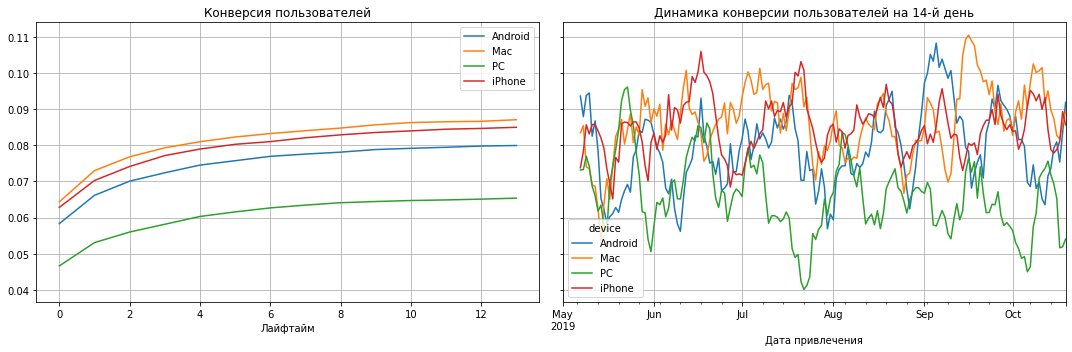

In [52]:
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['device'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

Пользователи Mac и iPhone конвертируются лучше всего. Но для полной картины лучше посмотреть на динамику удержания.

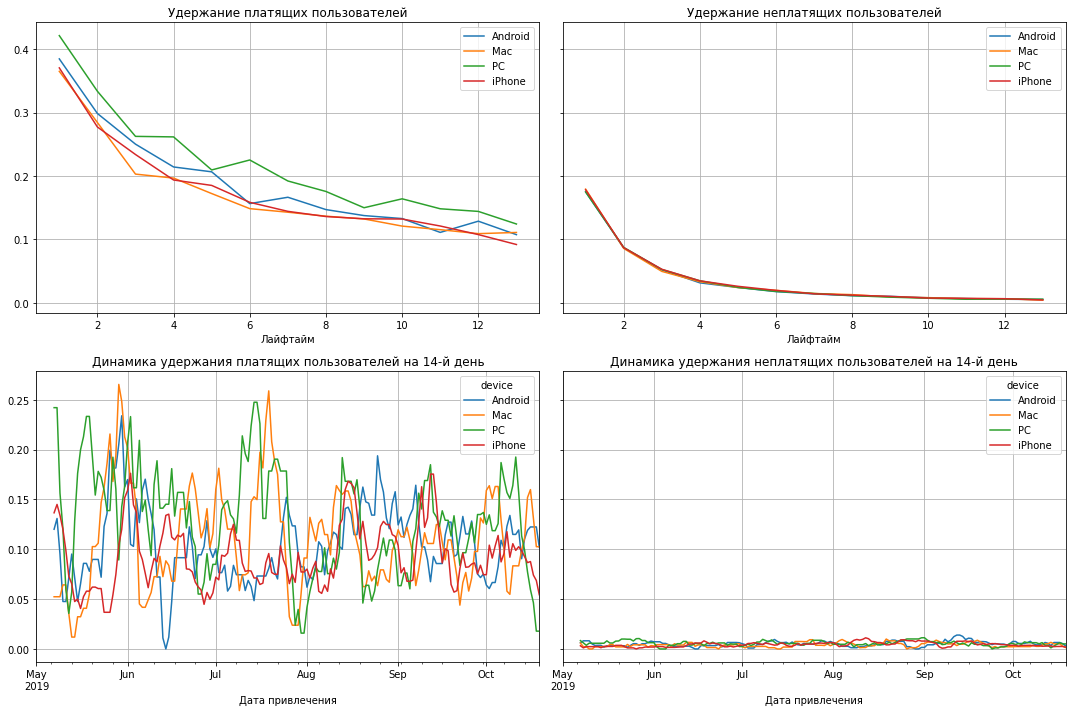

In [53]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Для платящих пользователей на PC и Android удержание немного лучше, чем на остальных устройствах.

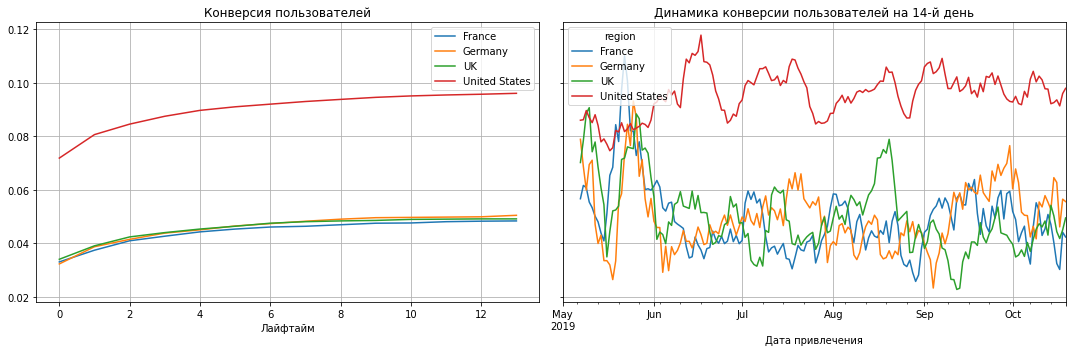

In [54]:
# расчет конверсии по странам
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['region'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

Лучше всего конвертируются пользователи из США. Однако, посмотрим на динамику удержания:

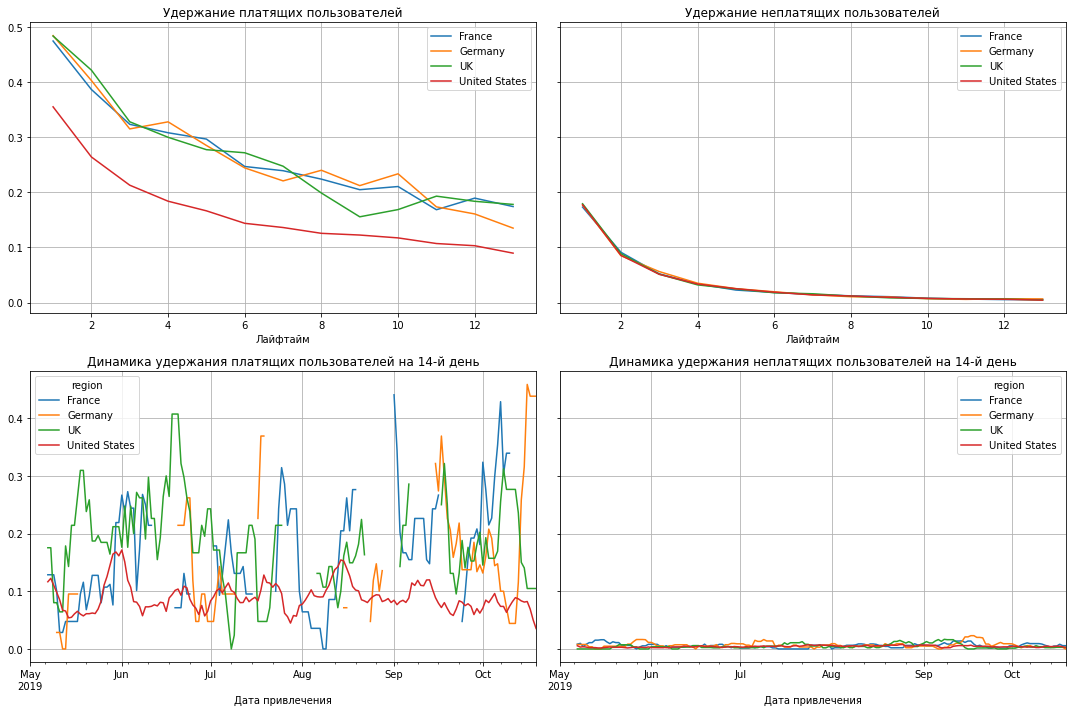

In [55]:

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Пользователи из США, несмотря на большую конверсию, удерживаются хуже всего. Для остальных стран ситуация примерна одинакова.

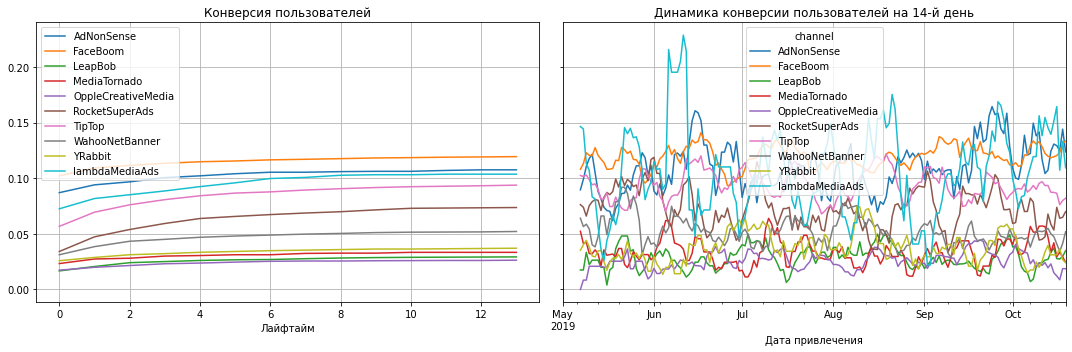

In [56]:
# расчеи конверсии по каналам
conversion_raw, conversion, conversion_history = get_conversion(profiles,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

По конверсии пользователей лидируют каналы FaceBoom, AdNonSense, LambdaMediaAds. Посмотрим на удержание в этих каналах.

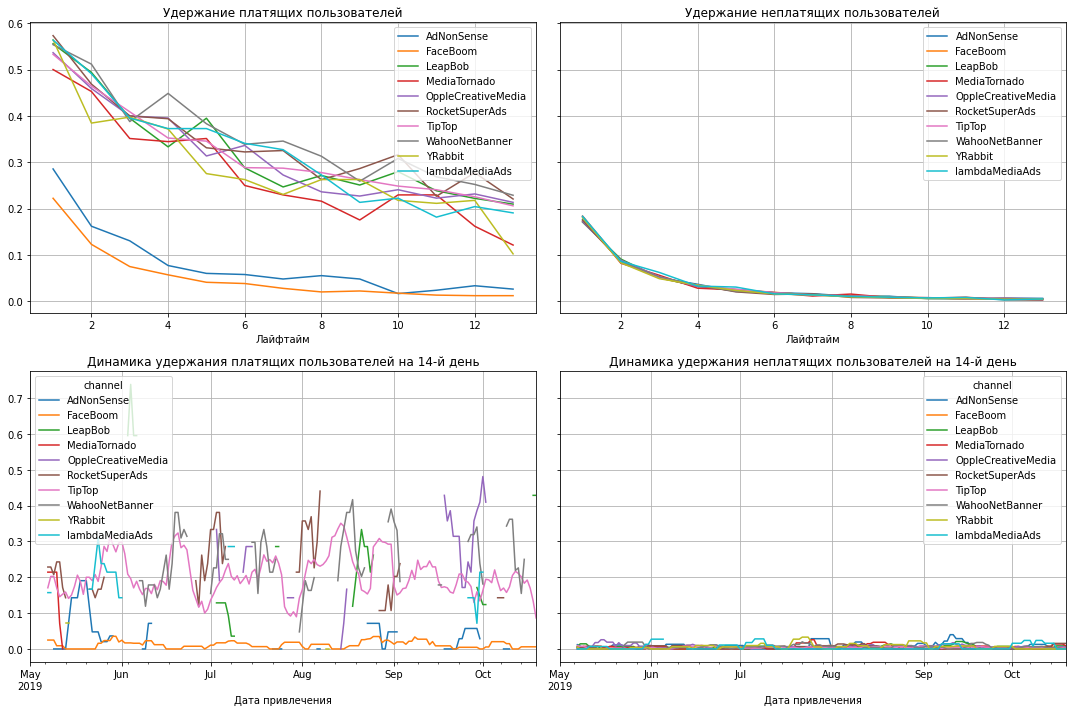

In [57]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Вывод: есть тенденция - хуже всего пользователи удерживаются там, где конверсия высокая: FaceBoom, AdNonSense.

### Расчет конверсии и удержания по каналам для отдельно для каждой страны

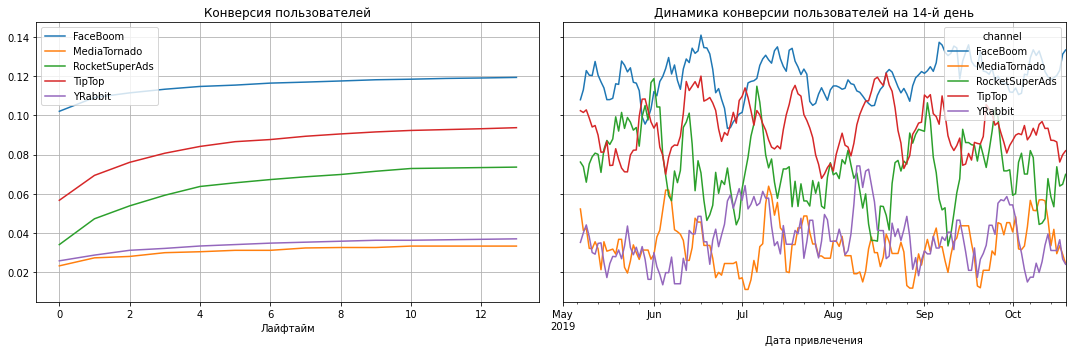

In [58]:
# расчет конверсии по каналам в регионе USA
conversion_raw, conversion, conversion_history = get_conversion(profiles_usa,
    orders,
    observation_date,
    horizon_days,
    dimensions=['channel'],
)

plot_conversion(conversion, conversion_history, horizon_days, window=7)

Удержание для каналов в регионе United States

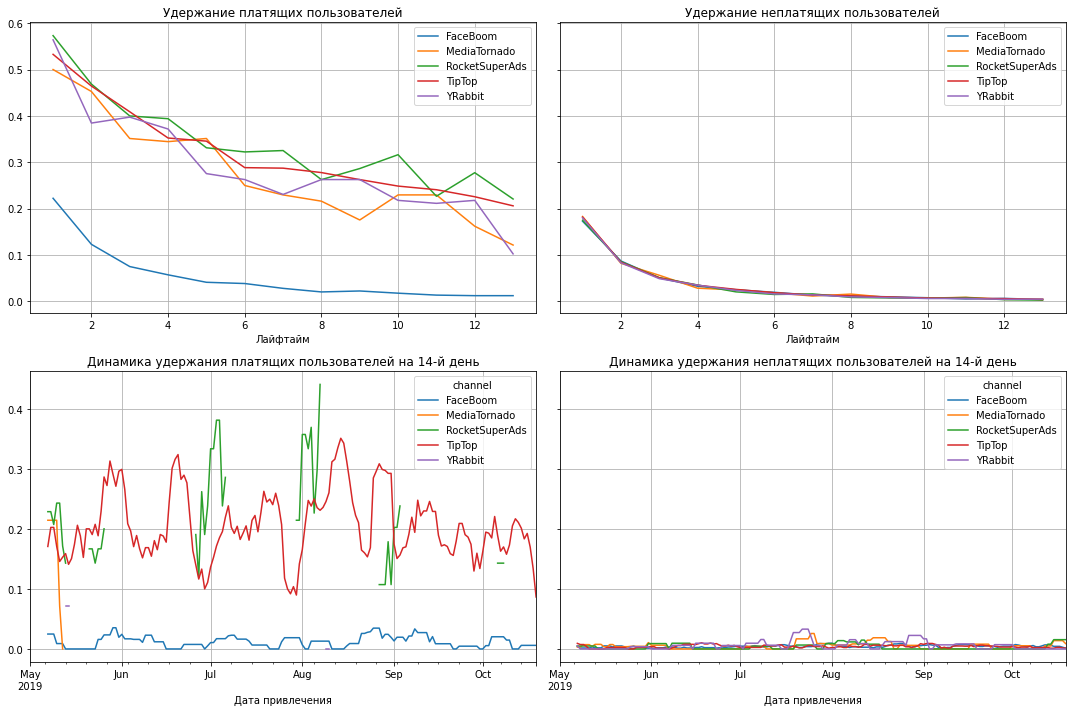

In [59]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Произведя анализ конверсии и удержания по каналам в регионе USA можно сказать что канал RocketSuperAds показывает хорошую конверсию и уровень удержания пользователей при меньшей стоимости привлечения пользователя. САС по этому каналу по времени только падала. Так же стоит обратить внимание на два других канала - YRabbit, MediaTornado. Они оба обладают значительно меньшей конверсией чем остальные каналы но удержание пользователей одни из самых лучших. Так же стоит отметить что ROI этих каналов показывает один из лучших результатов а стоимость привлечения пользователей один из самых низких 

### Вывод

Произведя оценку окупаемости рекламы можно сформулировать следующие основные тезисы:
* Окупаемости рекламы на выбранном горизонте анализа не происходит и достигает 80% а динамика ROI и вовсе имеет отрицательный характер что ни удивительно так как CAC только растет на всем промежутки анализа а LTV на конец горизонта анализа всегда имерно одинаков
При рассмотренни причин неокупаемости была была произведена разбивка по различным параметрам и в результате чего были сделаны следующие выводы:
- Дороже всех обходится привлекать пользователей iPhone и Mac динамика CAC пользователь использующих эти дивайсы растет боллее стеремительно чем остальных. LTV же примерно у всех пользователей одинаково вне зависимости от используемого девайса немного отстаею по этому показателю пользователи PC но это единственные пользователи акупаемость рекламы происходит.
- Если же смотреть относительно разбивки по странам. То можно заметить существенный рост CAC пользователей из USA с июня когда как эта метрика в других странах в этот же момент падает. LTV пользователей из USA больше чем остальных примерно в 1.4 раза и в среднем по динамики на 14 день горизонта анализа показывает более хорошие значения. Однако ROI пользователей из USA не достигает  1 в отведенный горизонт и имеет отрицательную динамику. Пользоваетели с других стран окупаются примерно на 4-5 день с нейтральной динамикой.
- При разбивки по канналам привлечение можно сказать что лучше всех LTV у кнаналов TipTop и lambdaMediaAds но только у второго из этих вдвоих получается выйти в окупаемость за отведенный период. Очень сильно растет CAC по каналу TipTop относительно остальных которые имеют в среднем стабильную стоимость. ROI каналов TipTop, AdNonSense и FaceBoom не окупаются. Динамика ROI по каналам в основном имеет нейтральный характер.

Выводы по CR и RR для в зависимости от разбивки:
- Хоть  конверсия платящих пользователей использующих iPhone и Mac  и лучше остальных удержание их показывает самые плохие показатели. Так же интересно что при самой низкой конверсии пользователей PC они имееют лучший RR а вот динамика конверсии и удержания имеют более сильную валотильность на полседний день горизонта анализа относительно остальных пользователей
- Если смотреть на конверсию и удержание относительно места проживания платящих пользователей то тут можно выделить пользователей проживающих в USA их конверсия лучше остальных регионов и в динамики тоже а вот удержание наоборот самое худшее из всех
- При разбивки по каналам привлечения можно сказать что по конверсии  и ее динамики  можно выделить FaceBoom, AdNonSense, LambdaMediaAds и TipTop. LambdaMediaAds в динамики имеет более сильную валатильность. А вот удержание платящих пользователей по каналам FaceBoom, AdNonSense самые худшие.

## Вывод

По итогу проведенного анализа можно сделать следущие выводы:
* В регионе United States каналы с большой конверсией такие как TipTop и FaceBoom обладаеют лучшей относительно других каналов конверсией но вот удержание значение удержания не соответствует необходимым в результоте чего окупаемость рекламы по этим каналам не происходит в заявленный горизонт. Также имеется тенденция увеличения САС для канала TipTop. Стоит рассмотреть изменение рекламной политики в этом регионе с переоринтацией на следущие каналы привлечения пользователей такие как:
1. RocketSuperAds не сильно отстает от ранее предыдущих каналов по конверсии но вот удержании на более хорошем уровне относительрно них разница примероно в 0.4. Так же у этого канала наблюдается снижение метрики САС за исследуемый период  что возможно повлияет на дольнейшее время окупаемости рекламы по этому каналу который сейчас равен 2 дням. 
2. YRabbit, MediaTornado - при низкой конверсии удеражние по этим каналам одно из самых лучших. САС меньше среди всех и на стабильном уровне но и что самое главное окупаемость рекламы равна 2 дням а ROI на конец горизонта анализа имеет максиммальные значения
* В европейском сегменте наблюдается следущие закономерности:
1. Окупаемость рекламы по каналу  AdNonSense не происходит не в одной из стран в необходимый горизонт анализа.
2. Стоит рассмотреть каналы lambdaMediaAds и LeapBob как приоритетные для привлечения пользователей так как ROI примерно равняется 2 и это лучший показатель в рассматриваемый горизонт анализа вне зависимости от страны а окупаемость рекламы в среднем наступает уже на 2 день.

Также возможно рассмотреть причины низких показателей по удержанию для устроист на iOS систмах при большой конвертации люди.